**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_ANNOT = "region.annotation.fcc_starrmpra_junke.tsv"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_ANNOT
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpra_junke.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_starrmpra_junke.tsv 


## Import data

**Read region annotation**

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_ANNOT
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = VEC_TXT_FOLDER

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 151862     12

$fcc_astarr_macs_input_union
[1] 196065     12



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Group,Label,Direction_Assay,Direction_Label,Region_Annot,Region_Count
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,fcc_starrmpra_junke_astarr,ASTARR,ASTARR_R,Repressive,R,chr1:10010-10430,1
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,fcc_starrmpra_junke_astarr,ASTARR,ASTARR_R,Repressive,R,chr1:16220-16340,1
chr1,17288,17689,chr1:17288-17689,fcc_astarr_macs_input_overlap,fcc_starrmpra_junke_astarr,ASTARR,ASTARR_R,Repressive,R,chr1:17230-17440;chr1:17610-17720,2


**Import GC content**

In [6]:
### set file names and labels
lst = list(
    "fcc_astarr_macs_input_overlap" = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.tsv",
    "fcc_astarr_macs_input_union"   = "K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.tsv"
    
)

### import files
lst = lapply(lst, function(txt_fname){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_nuc", "fcc_astarr_macs", "summary")
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_nuc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      6

$fcc_astarr_macs_input_union
[1] 246852      6



Chrom,ChromStart,ChromEnd,Region,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.587859,313


**Read region**

In [7]:
### set file directory
txt_fdiry = file.path(FD_RES, "region", "fcc_starrmpra_junke", "summary")
txt_fname = "K562.hg38.STARRMPRA.junke.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_original = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 447521      9


Chrom,ChromStart,ChromEnd,Name,Score,Strand,Group,Label,Dataset
chr1,115570,115730,peak_both_1,2.188151,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,778660,778890,peak_both_2,2.458460,.,ASTARR,ASTARR_AB,ASTARR_TR
chr1,1012990,1013680,peak_both_3,2.903266,.,ASTARR,ASTARR_AB,ASTARR_TR


## Arrange table

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get annotation and gc tables
    dat_region_annot = lst_dat_region_annot_import[[txt_folder]]
    dat_region_nuc   = lst_dat_region_nuc_import[[txt_folder]]

    ### arrange annotation
    dat = dat_region_annot
    dat = dat %>% dplyr::select(Region, Group, Label, Direction_Assay) %>% dplyr::distinct()
    dat_region_annot_arrange = dat

    ### join fcc annotation and gc content
    dat = dat_region_annot_arrange
    dat = dat %>% dplyr::left_join(dat_region_nuc, by = "Region") 
    return(dat)
})

### assign and show
lst_dat_region_annot_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 151862      9

$fcc_astarr_macs_input_union
[1] 196065      9



Region,Group,Label,Direction_Assay,Chrom,ChromStart,ChromEnd,pGC,Length
chr1:10038-10405,ASTARR,ASTARR_R,Repressive,chr1,10038,10405,0.523161,367
chr1:16025-16338,ASTARR,ASTARR_R,Repressive,chr1,16025,16338,0.587859,313
chr1:17288-17689,ASTARR,ASTARR_R,Repressive,chr1,17288,17689,0.625935,401


## Count table

**Total peaks**

In [9]:
dat = dat_region_original
dat = dat %>% 
    dplyr::mutate(Region = fun_gen_region(Chrom, ChromStart, ChromEnd)) %>%
    dplyr::select(Region, Group) %>%
    dplyr::distinct()

res = table(dat$Group, dnn = "Group")
dat = as.data.frame(res)

dat_region_peak_count = dat
fun_display_table(dat)

Group,Freq
ASTARR,229239
eSTARR,494
LMPRA,26192
TMPRA,6329
WSTARR,165627


**Count ATAC regions by group**

In [10]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, Group) %>% dplyr::distinct()
    res = table(dat$Group, dnn = "Group")
    dat = as.data.frame(res)
    return(dat)
})
dat = bind_rows(lst, .id = "Region")

### assign and show
dat_region_annot_count = dat
fun_display_table(dat)

Region,Group,Freq
fcc_astarr_macs_input_overlap,ASTARR,90765
fcc_astarr_macs_input_overlap,LMPRA,20905
fcc_astarr_macs_input_overlap,TMPRA,848
fcc_astarr_macs_input_overlap,WSTARR,29329
fcc_astarr_macs_input_union,ASTARR,121822
fcc_astarr_macs_input_union,LMPRA,22274
fcc_astarr_macs_input_union,TMPRA,1106
fcc_astarr_macs_input_union,WSTARR,38048


**Summarize**

In [11]:
tmp = dat_region_peak_count
tmp = tmp %>% dplyr::mutate(Freq = scales::comma(Freq))
colnames(tmp) = c("Group", "Peak (Total)")

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA")
dat = dat_region_annot_count
dat = dat %>% 
    dplyr::mutate(Group  = factor(Group, levels = vec)) %>%
    dplyr::mutate(Region = fun_str_map_atac(Region)) %>%
    dplyr::mutate(Freq   = scales::comma(Freq)) %>%
    tidyr::spread(Region, Freq)

dat = tmp %>% dplyr::right_join(dat, by = "Group")
dat %>% kableExtra::kable("markdown")



|Group  |Peak (Total) |ATAC (Overlap) |ATAC (Union) |
|:------|:------------|:--------------|:------------|
|ASTARR |229,239      |90,765         |121,822      |
|LMPRA  |26,192       |20,905         |22,274       |
|TMPRA  |6,329        |848            |1,106        |
|WSTARR |165,627      |29,329         |38,048       |

**Total ATAC regions**

In [12]:
lst = lst_dat_region_annot_import
lst = lapply(lst, function(dat){
    vec = unique(dat$Region)
    num = length(vec)
    txt = scales::comma(num)
    return(txt)
})
print(lst)

$fcc_astarr_macs_input_overlap
[1] "99,749"

$fcc_astarr_macs_input_union
[1] "135,016"



## GC content and region length distribution

In [13]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 16),
    #legend.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 16)
)

### set color
vec_txt_color  = c("Active" = "#fb8072", "Repressive" = "#80b1d3")
theme_color = scale_fill_manual(values = vec_txt_color)

### set factor order
vec_txt_direct = c("Active", "Repressive")

**Distribution of GC content**

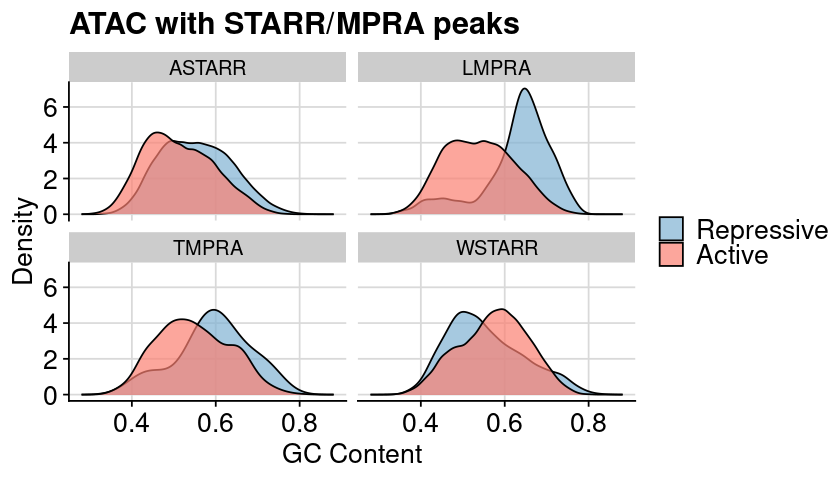

In [14]:
### get table and set factor
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Direction_Assay = factor(Direction_Assay, levels=rev(vec_txt_direct)))

### generate plot
gpt = ggplot(dat, aes(x=pGC, fill=Direction_Assay)) + 
    geom_density(alpha = 0.7) + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Group) +
    theme_color +
    theme_text +
    labs(x = "GC Content", y = "Density", title = "ATAC with STARR/MPRA peaks")

### assign and show
gpt_export_nuc = gpt
options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

**Distribution of region length**

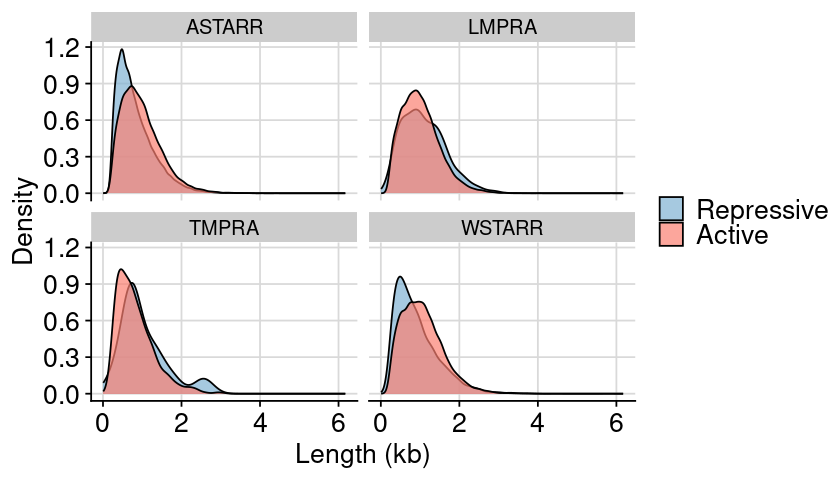

In [15]:
### get table and set factor
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Direction_Assay = factor(Direction_Assay, levels=rev(vec_txt_direct)))

### generate plot
gpt = ggplot(dat, aes(x=Length/1000, fill=Direction_Assay)) + 
    geom_density(alpha = 0.7) + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Group) +
    theme_color +
    theme_text +
    labs(x = "Length (kb)", y = "Density")

### assign and show
gpt_export_length = gpt
options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

**Save plots**

In [16]:
plt_export = gpt_export_nuc
txt_export = "fig.region_annot.astarr_input_overlap.fcc_starrmpra_junke.distribution.gc_content"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

In [17]:
plt_export = gpt_export_length
txt_export = "fig.region_annot.astarr_input_overlap.fcc_starrmpra_junke.distribution.length"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")